# Qualitative analysis of embeddings

In [1]:
import utils

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alba.garcia.romo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df_with_topics = utils.build_df_with_topics_extended("works_UB_2024_all.json")

In [7]:
df_extra_data = utils.preprocess_df_extra_data(df_with_topics)
print(df_extra_data)

               Domain_1           Domain_2           Domain_3  \
0     Physical Sciences  Physical Sciences  Physical Sciences   
1       Health Sciences    Health Sciences      Life Sciences   
2     Physical Sciences  Physical Sciences  Physical Sciences   
3     Physical Sciences  Physical Sciences    Social Sciences   
4     Physical Sciences  Physical Sciences  Physical Sciences   
...                 ...                ...                ...   
7873  Physical Sciences  Physical Sciences            Unknown   
7874  Physical Sciences            Unknown            Unknown   
7875  Physical Sciences            Unknown            Unknown   
7876  Physical Sciences  Physical Sciences            Unknown   
7877    Health Sciences            Unknown            Unknown   

                    Field_1                Field_2                Field_3  \
0     Physics and Astronomy       Computer Science  Physics and Astronomy   
1                  Medicine               Medicine           Neur

In [6]:
df = pd.read_parquet(r"01. data\df_works_UB_2024.parquet")
print(df)

                                              Work Name  Publication Year  \
0                            Review of Particle Physics              2024   
1     A biological definition of neuronal α-synuclei...              2024   
2     GWTC-2.1: Deep extended catalog of compact bin...              2024   
3         Robustness and resilience of complex networks              2024   
4         The search for neutrinoless double-beta decay              2024   
...                                                 ...               ...   
7873  Inkjet Printed Perovskite LEDs: Approaches, Li...              2024   
7874  Inkjet-printed FASnI3 photodetectors for flexi...              2024   
7875  Effect of annealing temperature on the propert...              2024   
7876  Nickel-manganese based anodes for efficient el...              2024   
7877  OR30-01 Brown Adipose Tissue as an Endocrine O...              2024   

                                                Authors  \
0     S. Navas, 

## 4.1. all-MiniLM-L6-v2 model
From sentence transformers

In [3]:
data_embeddings = utils.data_embeddings_from_df(df, 'Work Name')
print(data_embeddings)

['Review of Particle Physics', 'A biological definition of neuronal α-synuclein disease: towards an integrated staging system for research', 'GWTC-2.1: Deep extended catalog of compact binary coalescences observed by LIGO and Virgo during the first half of the third observing run', 'Robustness and resilience of complex networks', 'The search for neutrinoless double-beta decay', 'Unanswered questions following reports of secondary malignancies after CAR-T cell therapy', 'The Early Data Release of the Dark Energy Spectroscopic Instrument', 'Validation of the Scientific Program for the Dark Energy Spectroscopic Instrument', 'Four-year overall survival update from the phase III HIMALAYA study of tremelimumab plus durvalumab in unresectable hepatocellular carcinoma', 'Adjuvant and neoadjuvant immunotherapies in hepatocellular carcinoma', 'ESGO–ESMO–ESP consensus conference recommendations on ovarian cancer: pathology and molecular biology and early, advanced and recurrent disease', 'Current

In [ ]:
st_embeddings = utils.sentence_transformer_embeddings("all-MiniLM-L6-v2", data_embeddings)
print(st_embeddings)

Batches: 100%|██████████| 247/247 [00:34<00:00,  7.23it/s]

[[-0.12641235 -0.02771463 -0.03893553 ... -0.05287961 -0.00724775
   0.09533233]
 [ 0.01426623 -0.13185476  0.0065723  ...  0.00761158 -0.02792642
   0.02971002]
 [-0.03956535 -0.0570845   0.08655708 ... -0.15434839 -0.12489052
  -0.0154399 ]
 ...
 [-0.03804613 -0.03283216 -0.09303231 ... -0.01172536 -0.00600631
  -0.08656424]
 [-0.04251713  0.03324179  0.0291652  ...  0.02235696  0.0289136
   0.02670299]
 [-0.07811439  0.00159826 -0.0323818  ... -0.0002494   0.04868401
  -0.02310283]]
(7878, 384)
[[-0.12641235 -0.02771463 -0.03893553 ... -0.05287961 -0.00724775
   0.09533233]
 [ 0.01426623 -0.13185476  0.0065723  ...  0.00761158 -0.02792642
   0.02971002]
 [-0.03956535 -0.0570845   0.08655708 ... -0.15434839 -0.12489052
  -0.0154399 ]
 ...
 [-0.03804613 -0.03283216 -0.09303231 ... -0.01172536 -0.00600631
  -0.08656424]
 [-0.04251713  0.03324179  0.0291652  ...  0.02235696  0.0289136
   0.02670299]
 [-0.07811439  0.00159826 -0.0323818  ... -0.0002494   0.04868401
  -0.02310283]]


In [8]:
# save the embeddings
np.save("st_embeddings.npy_UB_2024", st_embeddings)

In [4]:
st_embeddings = np.load(r"C:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\OpenAlex\03. embeddings\st_embeddings_UB_2024.npy")

In [5]:
print(st_embeddings)

[[-0.12641235 -0.02771463 -0.03893553 ... -0.05287961 -0.00724775
   0.09533233]
 [ 0.01426623 -0.13185476  0.0065723  ...  0.00761158 -0.02792642
   0.02971002]
 [-0.03956535 -0.0570845   0.08655708 ... -0.15434839 -0.12489052
  -0.0154399 ]
 ...
 [-0.03804613 -0.03283216 -0.09303231 ... -0.01172536 -0.00600631
  -0.08656424]
 [-0.04251713  0.03324179  0.0291652  ...  0.02235696  0.0289136
   0.02670299]
 [-0.07811439  0.00159826 -0.0323818  ... -0.0002494   0.04868401
  -0.02310283]]


In [6]:
st_data_map = utils.create_data_map(15, 0.1, st_embeddings)

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [7]:
utils.save_coordinates(df, st_data_map, "st")
print(df)

                                           Work Name  Publication Year  \
0                         Review of Particle Physics              2024   
1  A biological definition of neuronal α-synuclei...              2024   

                                             Authors  \
0  S. Navas, C. Amsler, Th. Gutsche, C. Hanhart, ...   
1  Tanya Simuni, Lana M. Chahine, Kathleen L. Pos...   

                                   Primary Topic  \
0               Dark Matter and Cosmic Phenomena   
1  Parkinson's Disease Mechanisms and Treatments   

                          Subfield                  Field             Domain  \
0  Nuclear and High Energy Physics  Physics and Astronomy  Physical Sciences   
1                        Neurology               Medicine    Health Sciences   

                                            Abstract      x_st      y_st  
0  The summarizes much of particle physics and co...  7.533049  6.643386  
1                                        no abstract -0.4259

In [8]:
st_data_map =  df[['x_st', 'y_st']].to_numpy()
print(st_data_map)

[[ 7.533049    6.643386  ]
 [-0.42596456  4.4790387 ]
 [ 8.242578    6.476036  ]
 ...
 [ 6.1426196   7.20817   ]
 [ 5.6631846   6.034338  ]
 [-0.19118206  6.151637  ]]


In [10]:
import datamapplot
def create_datamapplot_customized(data_map, df_extra_data, embedding_model, n_neighbors, university):
    #open_alex_data_map = np.load("openalex_data_map.npy", allow_pickle=True)
    open_alex_topic_layers = []
    for layer_num in range(4):
        open_alex_topic_layers.append(
        np.load(f"openalex_layer{layer_num}_cluster_labels.npy", allow_pickle=True)
        )
    #print(open_alex_topic_layers)

    openalex_hover_data = np.load("openalex_hover_data.npy", allow_pickle=True)

    badge_css = """
        border-radius:8px;
        width:fit-content;
        max-width:70%;
        margin:2px;
        padding: 2px 8px 2px 8px;
        font-size: 8pt;
    """
    hover_text_template = f"""
    <div>
        <div style="font-size:10pt;padding:2px;">{{hover_text}}</div>
        <div style="background-color:{{color_1}};color:#fff;{badge_css}">{{Field_1_New}}</div>
        <div style="background-color:{{color_2}};color:#fff;{badge_css}">{{Field_2_New}}</div>
        <div style="background-color:{{color_3}};color:#fff;{badge_css}">{{Field_3_New}}</div>
    </div>
    """

    # Create the interactive plot
    plot = datamapplot.create_interactive_plot(
        data_map,
        open_alex_topic_layers[1],
        open_alex_topic_layers[2],
        open_alex_topic_layers[3],
        # open_alex_topic_layers[0], # dont use the primary topic for the visualization
        # masked_layers[3],
        # masked_layers[2],
        # masked_layers[1],
        # hover_text = openalex_hover_data["Work Name"],
        hover_text = openalex_hover_data,
        initial_zoom_fraction=0.95,
        font_family="Playfair Display SC",
        title= f"OpenAlex {university} Landscape",
        sub_title= f"A data map of papers from {university} in 2024",
        on_click="window.open(`http://google.com/search?q=\"{hover_text}\"`)",
        enable_search=True,
        darkmode=True,
        #inline_data=False,
        #offline_data_prefix="openalex_gallery",
        # cluster_boundary_polygons=True, # boundries are not fine enough
        # cluster_boundary_line_width=1,
        # polygon_alpha=1.9
        # use_medoids=True # does not work
        # cmap = custom_cmap,
        # palette_hue_shift=-0, # rotates color palette
        # palette_hue_radius_dependence=1, # =1 is default, more hue to separate clusters
        extra_point_data=df_extra_data,
        hover_text_html_template=hover_text_template,
        histogram_data= df_extra_data['Field_1'],
        histogram_n_bins= df_extra_data['Field_1'].nunique(),
        histogram_settings={
            "histogram_title": "Primary Field",
            "histogram_width": 500,
            "histogram_height": 100,
            "histogram_log_scale": False,
            "histogram_bin_fill_color": "#6baed6",
            "histogram_bin_selected_fill_color": "#2171b5",
            "histogram_bin_unselected_fill_color": "#c6dbef"
        }
    )
    plot.save(f"openalex_{university}_24_{embedding_model}_{n_neighbors}_neighbors.html")
    #print(plot)
    return plot

<InteractiveFigure width=100% height=800>
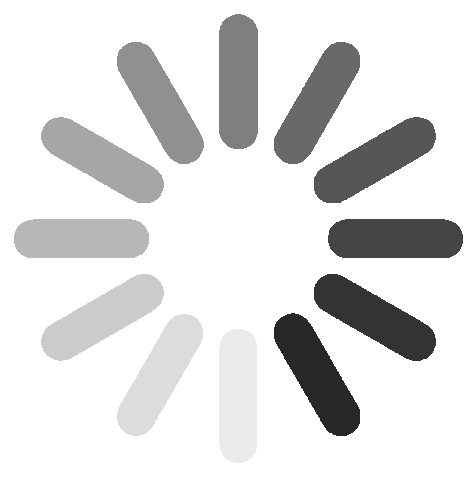

In [11]:
create_datamapplot_customized(st_data_map, df_extra_data, "st", "15", "UB" )

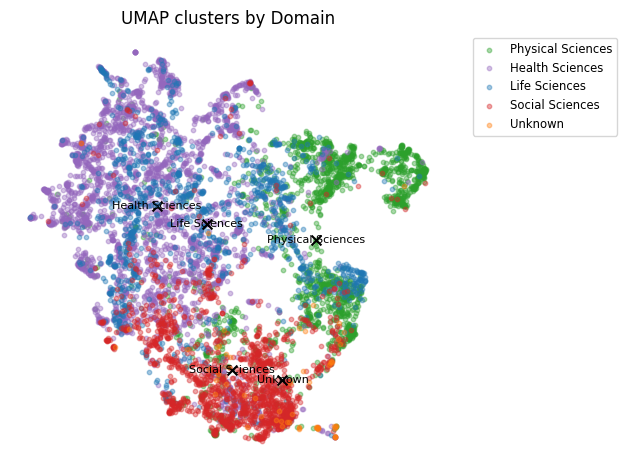

               label  count  centroid_x  centroid_y  avg_dist   std_dev
3    Social Sciences   1534    2.822948    1.125486  1.814605  1.114753
4            Unknown     62    4.245403    0.841318  1.952123  1.299203
1    Health Sciences   3250    0.675875    5.605784  2.578769  1.226551
0  Physical Sciences   1892    5.208808    4.661414  2.682868  1.240617
2      Life Sciences   1140    2.094917    5.091106  2.728963  1.228657


In [12]:
df_st_analysis = utils.compute_cluster_spread(df, label_col='Domain', x_col='x_st', y_col='y_st', plot=True)
print(df_st_analysis)

## 4.2. Nomic embed

In [14]:
data_embeddings = utils.data_embeddings_from_df(df, 'Work Name')
print(data_embeddings)

['Review of Particle Physics', 'A biological definition of neuronal α-synuclein disease: towards an integrated staging system for research', 'GWTC-2.1: Deep extended catalog of compact binary coalescences observed by LIGO and Virgo during the first half of the third observing run', 'Robustness and resilience of complex networks', 'The search for neutrinoless double-beta decay', 'Unanswered questions following reports of secondary malignancies after CAR-T cell therapy', 'The Early Data Release of the Dark Energy Spectroscopic Instrument', 'Validation of the Scientific Program for the Dark Energy Spectroscopic Instrument', 'Four-year overall survival update from the phase III HIMALAYA study of tremelimumab plus durvalumab in unresectable hepatocellular carcinoma', 'Adjuvant and neoadjuvant immunotherapies in hepatocellular carcinoma', 'ESGO–ESMO–ESP consensus conference recommendations on ovarian cancer: pathology and molecular biology and early, advanced and recurrent disease', 'Current

In [15]:
formated_data_embeddings = utils.format_title(data_embeddings)
print(formated_data_embeddings)

['clustering: Review of Particle Physics', 'clustering: A biological definition of neuronal α-synuclein disease: towards an integrated staging system for research', 'clustering: GWTC-2.1: Deep extended catalog of compact binary coalescences observed by LIGO and Virgo during the first half of the third observing run', 'clustering: Robustness and resilience of complex networks', 'clustering: The search for neutrinoless double-beta decay', 'clustering: Unanswered questions following reports of secondary malignancies after CAR-T cell therapy', 'clustering: The Early Data Release of the Dark Energy Spectroscopic Instrument', 'clustering: Validation of the Scientific Program for the Dark Energy Spectroscopic Instrument', 'clustering: Four-year overall survival update from the phase III HIMALAYA study of tremelimumab plus durvalumab in unresectable hepatocellular carcinoma', 'clustering: Adjuvant and neoadjuvant immunotherapies in hepatocellular carcinoma', 'clustering: ESGO–ESMO–ESP consensu

In [16]:
nomic_embeddings = utils.sentence_transformer_embeddings("nomic-ai/nomic-embed-text-v1", formated_data_embeddings)
print(nomic_embeddings)
# save the embeddings
np.save("nomic_embeddings.npy_UB_2024", nomic_embeddings)


<All keys matched successfully>
Batches: 100%|██████████| 247/247 [08:45<00:00,  2.13s/it]


[[ 0.02410446  0.03458417 -0.01177277 ...  0.01266402 -0.04680365
  -0.00546449]
 [ 0.02996932  0.01365646 -0.02776212 ...  0.03762071 -0.03732472
  -0.00443208]
 [-0.02019003 -0.00128146 -0.00989422 ... -0.00423274 -0.04745947
   0.04417025]
 ...
 [ 0.03728357  0.02506434 -0.01595512 ...  0.04944032 -0.05447761
  -0.00649486]
 [ 0.04462455  0.01114403  0.00247308 ... -0.03170606 -0.06963351
  -0.05178422]
 [ 0.0160973   0.04180247 -0.01287536 ...  0.03869779 -0.01648176
   0.00633881]]
(7878, 768)
[[ 0.02410446  0.03458417 -0.01177277 ...  0.01266402 -0.04680365
  -0.00546449]
 [ 0.02996932  0.01365646 -0.02776212 ...  0.03762071 -0.03732472
  -0.00443208]
 [-0.02019003 -0.00128146 -0.00989422 ... -0.00423274 -0.04745947
   0.04417025]
 ...
 [ 0.03728357  0.02506434 -0.01595512 ...  0.04944032 -0.05447761
  -0.00649486]
 [ 0.04462455  0.01114403  0.00247308 ... -0.03170606 -0.06963351
  -0.05178422]
 [ 0.0160973   0.04180247 -0.01287536 ...  0.03869779 -0.01648176
   0.00633881]]


In [10]:
nomic_embeddings = np.load(r"C:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\OpenAlex\03. embeddings\nomic_embeddings_UB_2024.npy")

In [11]:
nomic_data_map = utils.create_data_map(15, 0.1, nomic_embeddings)

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [12]:
utils.save_coordinates(df, nomic_data_map, "nomic")

                                           Work Name  Publication Year  \
0                         Review of Particle Physics              2024   
1  A biological definition of neuronal α-synuclei...              2024   

                                             Authors  \
0  S. Navas, C. Amsler, Th. Gutsche, C. Hanhart, ...   
1  Tanya Simuni, Lana M. Chahine, Kathleen L. Pos...   

                                   Primary Topic  \
0               Dark Matter and Cosmic Phenomena   
1  Parkinson's Disease Mechanisms and Treatments   

                          Subfield                  Field             Domain  \
0  Nuclear and High Energy Physics  Physics and Astronomy  Physical Sciences   
1                        Neurology               Medicine    Health Sciences   

                                            Abstract      x_st      y_st  \
0  The summarizes much of particle physics and co...  7.533049  6.643386   
1                                        no abstract -0.42

In [16]:
nomic_data_map =  df[['x_nomic', 'y_nomic']].to_numpy()
print(nomic_data_map)

[[ 8.944925  -3.5431907]
 [ 9.91987    0.8169201]
 [ 8.706508  -4.4062457]
 ...
 [10.138313  -3.2082474]
 [10.6559105 -2.340211 ]
 [10.284074   1.2861452]]


<InteractiveFigure width=100% height=800>
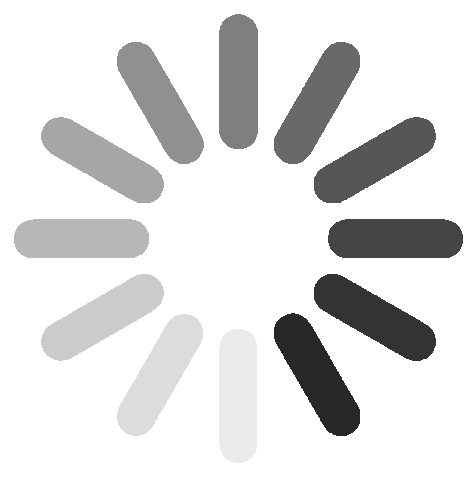

In [17]:
create_datamapplot_customized(nomic_data_map, df_extra_data, "nomic", "15", "UB")

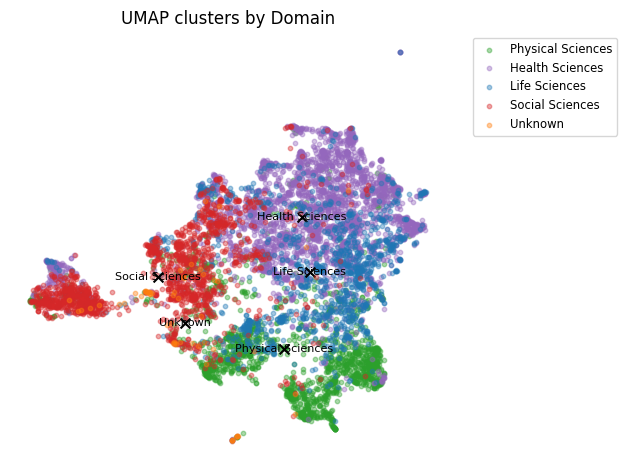

               label  count  centroid_x  centroid_y  avg_dist   std_dev
4            Unknown     62    5.264532   -1.252416  2.163936  1.378552
3    Social Sciences   1534    4.489965    0.286869  2.179875  1.102126
1    Health Sciences   3250    8.646315    2.317088  2.315242  1.538792
2      Life Sciences   1140    8.866915    0.456576  2.324013  1.267118
0  Physical Sciences   1892    8.129327   -2.111644  2.361315  1.302190


In [18]:
df_nomic_analysis = utils.compute_cluster_spread(df, label_col='Domain', x_col='x_nomic', y_col='y_nomic', plot=True)
print(df_nomic_analysis)

## 4.3. SPECTER2 model

In [26]:
# Check how many abstracts are NaN
print("NaN values:", df['Abstract'].isna().sum())

# Check how many abstracts are empty strings
print('Empty string values:', (df['Abstract'] == "").sum())

NaN values: 0
Empty string values: 0


In [22]:
# remove works with tempty abstracts

df = df[df['Abstract'] != ""]
print(len(df))

7878


In [14]:
# upload embeddings from file
# previously computed using the function in utils but ran in google colab for GPU

import torch

embeddings = torch.load(r"C:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\OpenAlex\03. embeddings\specter2_embeddings_UB_2024.pt")
print(embeddings.shape)  # Check shape

torch.Size([7878, 768])


In [15]:
specter_data_map = utils.create_data_map(n_neighbors=15, min_dist=0.1, embeddings=embeddings)
print(specter_data_map.shape)

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(7878, 2)


In [16]:
utils.save_coordinates(df, specter_data_map, "specter")

                                           Work Name  Publication Year  \
0                         Review of Particle Physics              2024   
1  A biological definition of neuronal α-synuclei...              2024   

                                             Authors  \
0  S. Navas, C. Amsler, Th. Gutsche, C. Hanhart, ...   
1  Tanya Simuni, Lana M. Chahine, Kathleen L. Pos...   

                                   Primary Topic  \
0               Dark Matter and Cosmic Phenomena   
1  Parkinson's Disease Mechanisms and Treatments   

                          Subfield                  Field             Domain  \
0  Nuclear and High Energy Physics  Physics and Astronomy  Physical Sciences   
1                        Neurology               Medicine    Health Sciences   

                                            Abstract      x_st      y_st  \
0  The summarizes much of particle physics and co...  7.533049  6.643386   
1                                        no abstract -0.42

In [23]:
df.columns

Index(['Work Name', 'Publication Year', 'Authors', 'Primary Topic', 'Subfield',
       'Field', 'Domain', 'Abstract', 'x_st', 'y_st', 'x_nomic', 'y_nomic',
       'x_specter', 'y_specter'],
      dtype='object')

## Load full df

In [3]:
# save df into parquet file
df.to_parquet("df_works_UB_2024.parquet", index=False)

NameError: name 'df' is not defined

In [4]:
import pandas as pd
df = pd.read_parquet("df_works_UB_2024.parquet")


In [5]:
print(df)
#print(df_test)

                                              Work Name  Publication Year  \
0                            Review of Particle Physics              2024   
1     A biological definition of neuronal α-synuclei...              2024   
2     GWTC-2.1: Deep extended catalog of compact bin...              2024   
3         Robustness and resilience of complex networks              2024   
4         The search for neutrinoless double-beta decay              2024   
...                                                 ...               ...   
7873  Inkjet Printed Perovskite LEDs: Approaches, Li...              2024   
7874  Inkjet-printed FASnI3 photodetectors for flexi...              2024   
7875  Effect of annealing temperature on the propert...              2024   
7876  Nickel-manganese based anodes for efficient el...              2024   
7877  OR30-01 Brown Adipose Tissue as an Endocrine O...              2024   

                                                Authors  \
0     S. Navas, 

In [22]:
import os
print(os.getcwd())

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\OpenAlex


In [19]:
specter_data_map =  df[['x_specter', 'y_specter']].to_numpy()
print(specter_data_map)

[[ 3.6434128  3.7774467]
 [10.084192   3.089385 ]
 [ 2.5660596  3.5401924]
 ...
 [ 5.580044   4.797156 ]
 [ 6.569313   5.155772 ]
 [11.537097   1.9132864]]


<InteractiveFigure width=100% height=800>
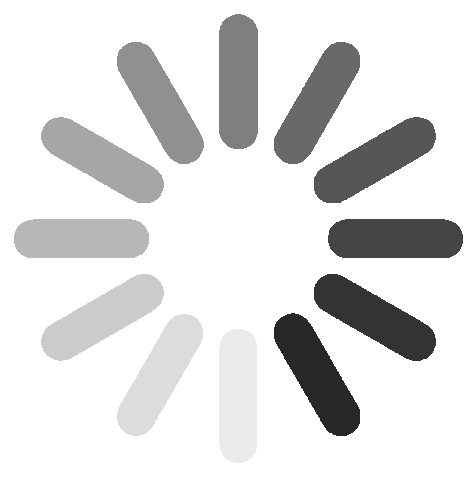

In [20]:
create_datamapplot_customized(specter_data_map, df_extra_data, "specter2", "15", "UB")

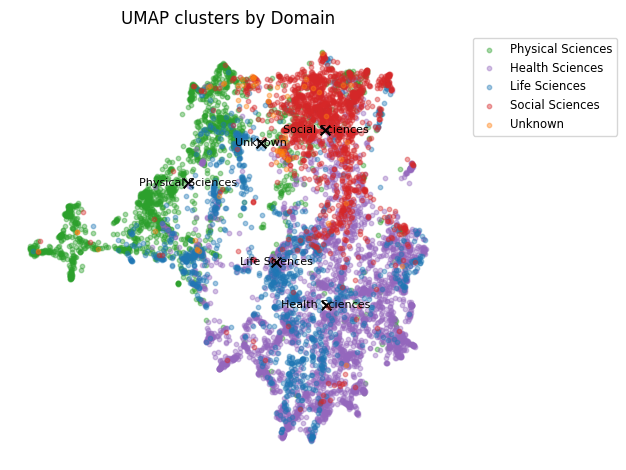

               label  count  centroid_x  centroid_y  avg_dist   std_dev
3    Social Sciences   1534   11.544288    6.622336  1.463801  1.093090
4            Unknown     62    9.515633    6.287239  2.148745  1.607155
1    Health Sciences   3250   11.561981    2.202484  2.328284  1.061992
2      Life Sciences   1140    9.998125    3.282483  2.626552  1.270081
0  Physical Sciences   1892    7.219697    5.276169  2.743095  1.561510


In [21]:
df_specter_analysis = utils.compute_cluster_spread(df, label_col='Domain', x_col='x_specter', y_col='y_specter', plot=True)
print(df_specter_analysis)

In [37]:
df_st_analysis_fields = utils.compute_cluster_spread(df, label_col='Field', x_col='x_st', y_col='y_st', plot=False)
print(df_st_analysis_fields)
df_nomic_analysis_fields = utils.compute_cluster_spread(df, label_col='Field', x_col='x_nomic', y_col='y_nomic', plot=False)
print(df_nomic_analysis_fields)
df_specter_analysis_fields = utils.compute_cluster_spread(df, label_col='Field', x_col='x_specter', y_col='y_specter', plot=False)
print(df_specter_analysis_fields)

                                           label  count  centroid_x  \
18                             Materials Science    174    5.276450   
16                                     Dentistry     56    2.407021   
19                  Earth and Planetary Sciences    230    5.720250   
10                                        Energy     51    5.475793   
23           Business, Management and Accounting     67    3.199297   
22                          Chemical Engineering     15    5.305119   
4                                      Chemistry     99    4.804228   
9                                Social Sciences    678    3.100206   
13                           Arts and Humanities    271    3.720585   
2                          Environmental Science    443    4.884760   
26                             Decision Sciences     38    3.127371   
20                                    Psychology    364    1.399770   
0                          Physics and Astronomy    355    6.790926   
14    

## Quantitavie metrics

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

# https://www.geeksforgeeks.org/clustering-metrics/

models = ['st', 'nomic', 'specter']
labels = df['Domain'].astype(str).values # domain of primary topic
print(labels.shape)

for model in models:
    print(f"\nresults of model: {model}")
    X = df[[f"x_{model}", f"y_{model}"]].values

    # Silhouette Score: 1 is better (range: -1 to 1)
    silhouette = silhouette_score(X, labels)

    # Davies-Bouldin Index: lower is better
    davies_bouldin = davies_bouldin_score(X, labels)

    # Calinski-Harabasz Index: higher is better
    calinski_harabasz = calinski_harabasz_score(X, labels)

    #-> cannot do it, compares labels true with labels pred
    # Adjusted Rand Index (ARI): 1 is better (range: -1 to 1) 
    #ari = adjusted_rand_score(X, labels)
    # Mutual Information: higher is better
    #mi = mutual_info_score(X, labels)

    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    #print(f"Adjusted Rand Index: {ari:.2f}")
    #print(f"Mutual Information (MI): {mi:.2f}")


(7878,)

results of model: st
Silhouette Score: 0.0266
Davies-Bouldin Index: 2.7895
Calinski-Harabasz Index: 1554.3284

results of model: nomic
Silhouette Score: 0.0566
Davies-Bouldin Index: 2.3495
Calinski-Harabasz Index: 1564.6227

results of model: specter
Silhouette Score: 0.0775
Davies-Bouldin Index: 2.1742
Calinski-Harabasz Index: 1800.4878


## Analysis on the embeddings space (high dimensional)

### Intra cluster study

Study of distances inside the same cluster in both spaces


In [11]:
df_st_hd_analysis = utils.compute_cluster_spread_embeddings(df, st_embeddings, label_col='Domain')
print(df_st_hd_analysis)
df_nomic_hd_analysis = utils.compute_cluster_spread_embeddings(df, nomic_embeddings, label_col='Domain')
print(df_nomic_hd_analysis)
df_specter_hd_analysis = utils.compute_cluster_spread_embeddings(df, embeddings, label_col='Domain')
print(df_specter_hd_analysis)

               label  count  avg_dist   std_dev  \
4            Unknown     62  0.938594  0.038514   
3    Social Sciences   1534  0.941608  0.053892   
1    Health Sciences   3250  0.962423  0.029207   
2      Life Sciences   1140  0.962934  0.035061   
0  Physical Sciences   1892  0.979270  0.022350   

                                            centroid  
4  [-0.014199665, 0.044156075, 0.0012342851, 0.02...  
3  [0.027909745, 0.017749636, -0.0074989465, 0.00...  
1  [0.013955697, -0.006229797, -0.010343542, 0.00...  
2  [-0.003490073, -0.031329837, -0.010814579, 0.0...  
0  [-0.014779413, -0.009001211, 0.013143776, 0.00...  
               label  count  avg_dist   std_dev  \
4            Unknown     62  0.663445  0.046614   
2      Life Sciences   1140  0.695582  0.041985   
1    Health Sciences   3250  0.697223  0.035798   
3    Social Sciences   1534  0.697946  0.037692   
0  Physical Sciences   1892  0.710470  0.034958   

                                            centroid  
4

In [16]:
def prepare_spread_comparison(df_2d, df_hd, model_name):
    merged = pd.merge(df_2d[['label', 'avg_dist', 'centroid_x', 'centroid_y']], df_hd[['label', 'avg_dist', 'centroid']], on='label', suffixes=('_2d', '_hd'))
    merged['model'] = model_name
    merged['spread_ratio'] = merged['avg_dist_2d'] / merged['avg_dist_hd']
    return merged

In [17]:
df_st = prepare_spread_comparison(df_st_analysis, df_st_hd_analysis, 'st')
print(df_st)
df_nomic = prepare_spread_comparison(df_nomic_analysis, df_nomic_hd_analysis, 'nomic')
print(df_nomic)
df_specter = prepare_spread_comparison(df_specter_analysis, df_specter_hd_analysis, 'specter')
print(df_specter)

               label  avg_dist_2d  centroid_x  centroid_y  avg_dist_hd  \
0    Social Sciences     1.814605    2.822948    1.125486     0.941608   
1            Unknown     1.952123    4.245403    0.841318     0.938594   
2    Health Sciences     2.578769    0.675875    5.605784     0.962423   
3  Physical Sciences     2.682868    5.208808    4.661414     0.979270   
4      Life Sciences     2.728963    2.094917    5.091106     0.962934   

                                            centroid model  spread_ratio  
0  [0.027909745, 0.017749636, -0.0074989465, 0.00...    st      1.927133  
1  [-0.014199665, 0.044156075, 0.0012342851, 0.02...    st      2.079838  
2  [0.013955697, -0.006229797, -0.010343542, 0.00...    st      2.679456  
3  [-0.014779413, -0.009001211, 0.013143776, 0.00...    st      2.739661  
4  [-0.003490073, -0.031329837, -0.010814579, 0.0...    st      2.834008  
               label  avg_dist_2d  centroid_x  centroid_y  avg_dist_hd  \
0            Unknown     2.1639

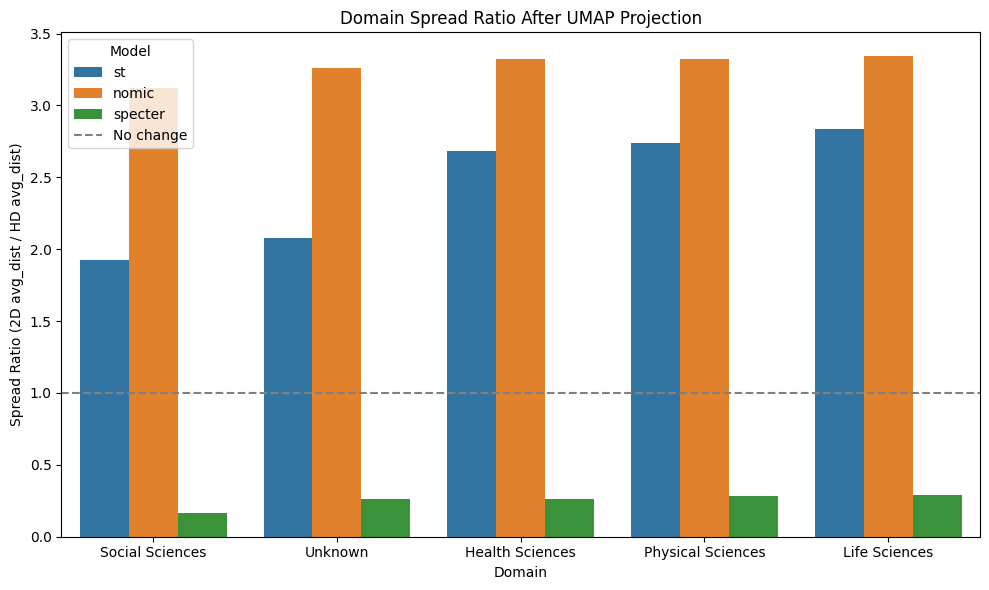

In [18]:
# Combine all into one DataFrame
df_all = pd.concat([df_st, df_nomic, df_specter], ignore_index=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_all, x='label', y='spread_ratio', hue='model')
plt.axhline(1.0, color='gray', linestyle='--', label='No change')
plt.ylabel("Spread Ratio (2D avg_dist / HD avg_dist)")
plt.xlabel("Domain")
plt.title("Domain Spread Ratio After UMAP Projection")
plt.legend(title="Model")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

The bar plot and table above compare the average intra-domain distances in the original high-dimensional (HD) space with those in the 2D UMAP projection, using the spread ratio (2D avg_dist / HD avg_dist).

Key Takeaways:
ST and NOMIC embeddings show a significant increase in average intra-domain distances after UMAP projection, suggesting that:

UMAP has expanded local clusters considerably in 2D.

This reflects a distortion where local neighborhoods become more spread out, likely sacrificing some global structure to better preserve local relationships.

SPECTER2, on the other hand, shows a decrease in distances in 2D:

Suggesting that UMAP contracts the clusters, possibly because they were already well-structured or dense in the HD space.

It may indicate UMAP is preserving global structure better with SPECTER2, or that embeddings are more separable to begin with.

Interpretation of Local vs Global Preservation:
UMAP is designed to prioritize local structure, meaning it maintains relationships between close points while allowing global distortions.

If spread ratio >> 1 (as seen with ST and NOMIC), it’s a sign UMAP is stretching the space, potentially overemphasizing distinctions between clusters.

If spread ratio < 1 (SPECTER2), it suggests compression of clusters, which may indicate more compact or well-defined clusters in HD.

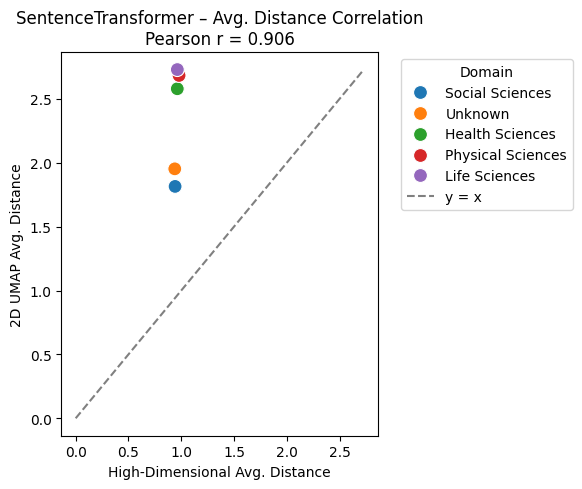

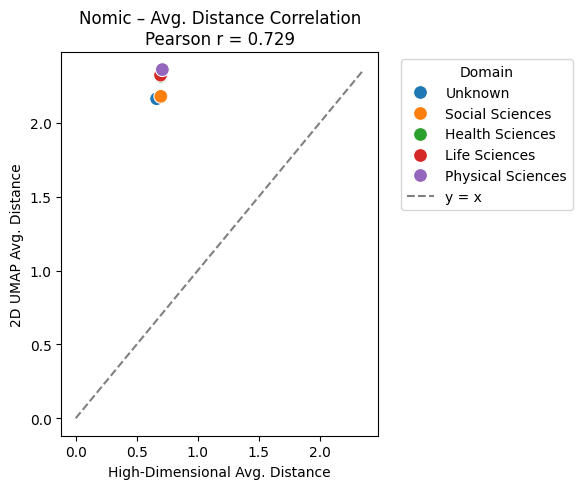

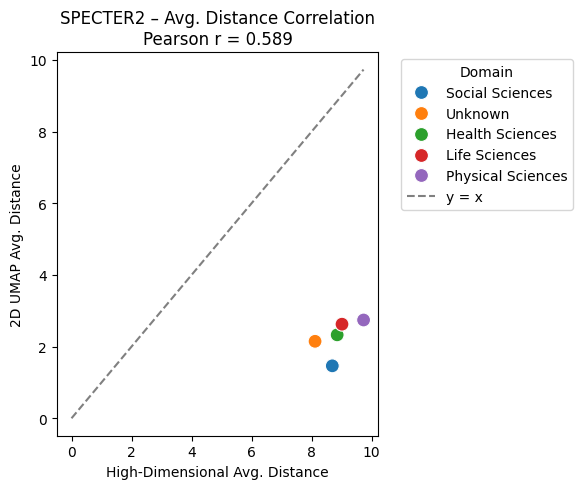

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_hd_vs_2d(df, model_name):
    plt.figure(figsize=(6, 5))
    
    # Scatter
    sns.scatterplot(data=df, x='avg_dist_hd', y='avg_dist_2d', hue='label', s=100)
    
    # Identity line (perfect preservation)
    max_val = max(df['avg_dist_hd'].max(), df['avg_dist_2d'].max())
    plt.plot([0, max_val], [0, max_val], linestyle='--', color='gray', label='y = x')

    # Correlation coefficient
    corr = np.corrcoef(df['avg_dist_hd'], df['avg_dist_2d'])[0, 1]
    plt.title(f"{model_name} – Avg. Distance Correlation\nPearson r = {corr:.3f}")
    
    plt.xlabel("High-Dimensional Avg. Distance")
    plt.ylabel("2D UMAP Avg. Distance")
    plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot for each model (replace with your actual DataFrames)
plot_hd_vs_2d(df_st, "SentenceTransformer")
plot_hd_vs_2d(df_nomic, "Nomic")
plot_hd_vs_2d(df_specter, "SPECTER2")


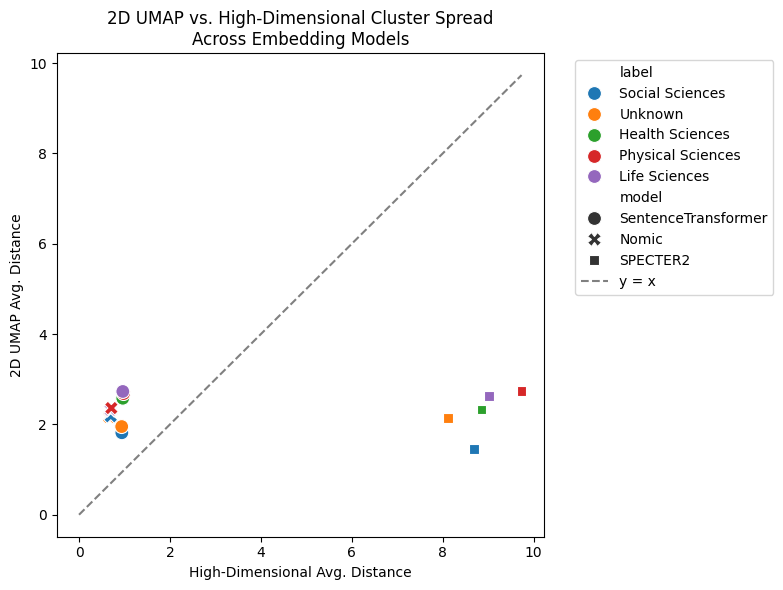

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First, make sure your 3 dataframes have the same structure
# and include a 'model' column
df_st['model'] = 'SentenceTransformer'
df_nomic['model'] = 'Nomic'
df_specter['model'] = 'SPECTER2'

# Concatenate them into one DataFrame
df_all = pd.concat([df_st, df_nomic, df_specter], ignore_index=True)

# Create the combined scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all,
    x='avg_dist_hd', y='avg_dist_2d',
    hue='label', style='model', s=100
)

# Add identity line (perfect preservation)
max_val = max(df_all['avg_dist_hd'].max(), df_all['avg_dist_2d'].max())
plt.plot([0, max_val], [0, max_val], linestyle='--', color='gray', label='y = x')

# Add title and labels
plt.title("2D UMAP vs. High-Dimensional Cluster Spread\nAcross Embedding Models")
plt.xlabel("High-Dimensional Avg. Distance")
plt.ylabel("2D UMAP Avg. Distance")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


📌 Interpretation:

Points near the diagonal line mean spread is preserved.

Points above the line: UMAP increased average intra-domain distance.

Points below: UMAP contracted intra-domain distance.

Pearson correlation coefficient (r) gives a numeric measure of similarity.

### Inter cluster study

Study of distances between different clusters in both spaces

In [30]:
print(df_all['centroid'])

0     [0.027909745, 0.017749636, -0.0074989465, 0.00...
1     [-0.014199665, 0.044156075, 0.0012342851, 0.02...
2     [0.013955697, -0.006229797, -0.010343542, 0.00...
3     [-0.014779413, -0.009001211, 0.013143776, 0.00...
4     [-0.003490073, -0.031329837, -0.010814579, 0.0...
5     [0.01514677, 0.018829761, -0.023182176, -0.036...
6     [0.012791018, 0.038672768, -0.02745307, -0.034...
7     [0.0076252883, 0.019301053, -0.018216273, -0.0...
8     [0.0055631828, 0.016214542, -0.018520854, -0.0...
9     [0.008717535, 0.022669824, -0.021660553, -0.03...
10    [tensor(0.1522), tensor(0.7840), tensor(-0.678...
11    [tensor(0.2316), tensor(0.7032), tensor(-0.723...
12    [tensor(0.4112), tensor(0.6206), tensor(-0.618...
13    [tensor(0.5558), tensor(0.5198), tensor(-0.481...
14    [tensor(0.3656), tensor(0.4802), tensor(-0.501...
Name: centroid, dtype: object


In [64]:
df_st = df_all[df_all['model'] == 'st']
df_nomic = df_all[df_all['model'] == 'nomic']
df_specter = df_all[df_all['model'] == 'specter']
#print(df_st)

In [65]:
df_st_2d_centroids = df_st[['label', 'centroid_x', 'centroid_y']]
df_nomic_2d_centroids = df_nomic[['label', 'centroid_x', 'centroid_y']]
df_specter_2d_centroids = df_specter[['label', 'centroid_x', 'centroid_y']]
print(df_st_2d_centroids)

               label  centroid_x  centroid_y
0    Social Sciences    2.822948    1.125486
1            Unknown    4.245403    0.841318
2    Health Sciences    0.675875    5.605784
3  Physical Sciences    5.208808    4.661414
4      Life Sciences    2.094917    5.091106


In [66]:
df_st_hd_centroids = df_st[['label', 'centroid']]
df_nomic_hd_centroids = df_nomic[['label', 'centroid']]
df_specter_hd_centroids = df_specter[['label', 'centroid']]

In [68]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you have centroid dataframes from previous computations for 2D and HD for each model.
# For demonstration, here's an example structure of a centroid dataframe (e.g., for sentence-transformer 2D):


# Compute centroid-to-centroid distance matrices
def compute_2d_centroid_distance_matrix(df, label_col='label', x_col='centroid_x', y_col='centroid_y'):
    coords = df[[x_col, y_col]].values
    labels = df[label_col].values
    dist_matrix = cdist(coords, coords)
    return pd.DataFrame(dist_matrix, index=labels, columns=labels)

def compute_hd_centroid_distance_matrix(df, label_col='label', centroid_col='centroid'):
    coords = np.vstack(df[centroid_col].values)  # Convert list of arrays into 2D numpy array
    labels = df[label_col].values
    dist_matrix = cdist(coords, coords, metric='euclidean')
    return pd.DataFrame(dist_matrix, index=labels, columns=labels)

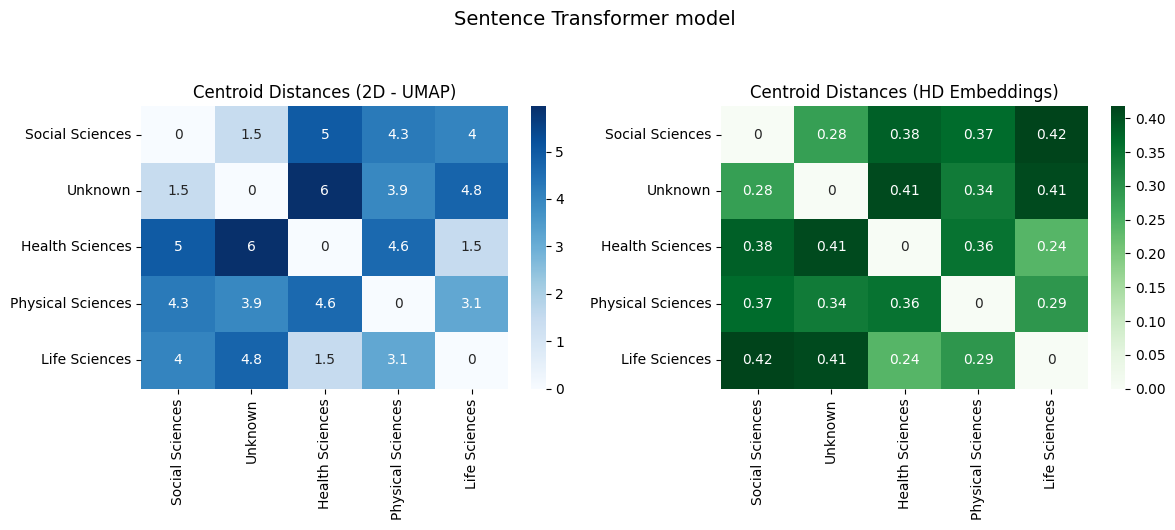

(                   Social Sciences   Unknown  Health Sciences  \
 Social Sciences           0.000000  1.450562         4.968198   
 Unknown                   1.450562  0.000000         5.953291   
 Health Sciences           4.968198  5.953291         0.000000   
 Physical Sciences         4.265572  3.939705         4.630261   
 Life Sciences             4.031894  4.762908         1.509495   
 
                    Physical Sciences  Life Sciences  
 Social Sciences             4.265572       4.031894  
 Unknown                     3.939705       4.762908  
 Health Sciences             4.630261       1.509495  
 Physical Sciences           0.000000       3.143398  
 Life Sciences               3.143398       0.000000  ,
                    Social Sciences   Unknown  Health Sciences  \
 Social Sciences           0.000000  0.280261         0.381587   
 Unknown                   0.280261  0.000000         0.408858   
 Health Sciences           0.381587  0.408858         0.000000   
 Physic

In [69]:
# Generate distance matrices for 2D and HD
st_2d_distances = compute_2d_centroid_distance_matrix(df_st_2d_centroids)
st_hd_distances = compute_hd_centroid_distance_matrix(df_st_hd_centroids) 

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(st_2d_distances, ax=axes[0], annot=True, cmap="Blues")
axes[0].set_title("Centroid Distances (2D - UMAP)")

sns.heatmap(st_hd_distances, ax=axes[1], annot=True, cmap="Greens")
axes[1].set_title("Centroid Distances (HD Embeddings)")

plt.suptitle("Sentence Transformer model", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


st_2d_distances, st_hd_distances

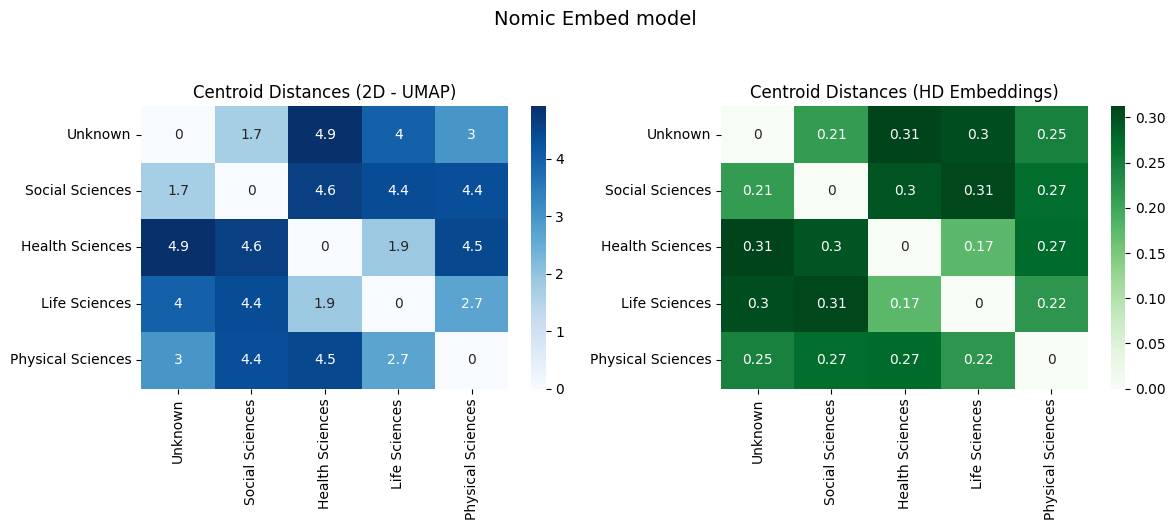

(                    Unknown  Social Sciences  Health Sciences  Life Sciences  \
 Unknown            0.000000         1.723181         4.917094       3.987207   
 Social Sciences    1.723181         0.000000         4.625693       4.380239   
 Health Sciences    4.917094         4.625693         0.000000       1.873544   
 Life Sciences      3.987207         4.380239         1.873544       0.000000   
 Physical Sciences  2.990873         4.358649         4.458806       2.672039   
 
                    Physical Sciences  
 Unknown                     2.990873  
 Social Sciences             4.358649  
 Health Sciences             4.458806  
 Life Sciences               2.672039  
 Physical Sciences           0.000000  ,
                     Unknown  Social Sciences  Health Sciences  Life Sciences  \
 Unknown            0.000000         0.213413         0.312325       0.303115   
 Social Sciences    0.213413         0.000000         0.295253       0.309492   
 Health Sciences    0.312325

In [70]:
# Generate distance matrices for 2D and HD
nomic_2d_distances = compute_2d_centroid_distance_matrix(df_nomic_2d_centroids)
nomic_hd_distances = compute_hd_centroid_distance_matrix(df_nomic_hd_centroids) 

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(nomic_2d_distances, ax=axes[0], annot=True, cmap="Blues")
axes[0].set_title("Centroid Distances (2D - UMAP)")

sns.heatmap(nomic_hd_distances, ax=axes[1], annot=True, cmap="Greens")
axes[1].set_title("Centroid Distances (HD Embeddings)")

plt.suptitle("Nomic Embed model", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


nomic_2d_distances, nomic_hd_distances

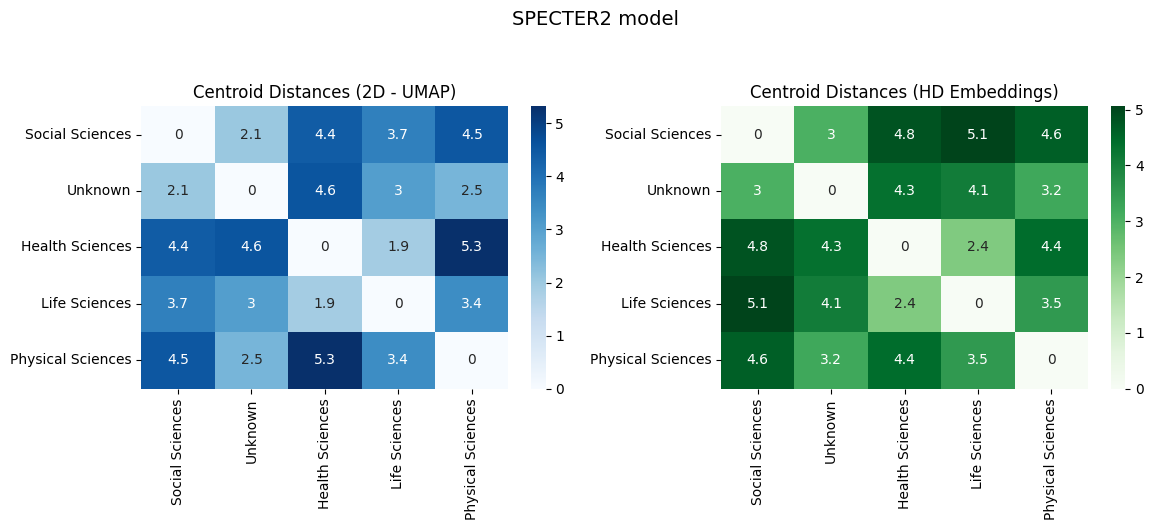

(                   Social Sciences   Unknown  Health Sciences  Life Sciences  \
 Social Sciences           0.000000  2.056145         4.419887       3.680385   
 Unknown                   2.056145  0.000000         4.568672       3.043247   
 Health Sciences           4.419887  4.568672         0.000000       1.900538   
 Life Sciences             3.680385  3.043247         1.900538       0.000000   
 Physical Sciences         4.529265  2.508701         5.320053       3.419714   
 
                    Physical Sciences  
 Social Sciences             4.529265  
 Unknown                     2.508701  
 Health Sciences             5.320053  
 Life Sciences               3.419714  
 Physical Sciences           0.000000  ,
                    Social Sciences   Unknown  Health Sciences  Life Sciences  \
 Social Sciences           0.000000  3.026854         4.819874       5.058447   
 Unknown                   3.026854  0.000000         4.339170       4.092721   
 Health Sciences           4

In [71]:
# Generate distance matrices for 2D and HD
specter_2d_distances = compute_2d_centroid_distance_matrix(df_specter_2d_centroids)
specter_hd_distances = compute_hd_centroid_distance_matrix(df_specter_hd_centroids) 

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(specter_2d_distances, ax=axes[0], annot=True, cmap="Blues")
axes[0].set_title("Centroid Distances (2D - UMAP)")

sns.heatmap(specter_hd_distances, ax=axes[1], annot=True, cmap="Greens")
axes[1].set_title("Centroid Distances (HD Embeddings)")

plt.suptitle("SPECTER2 model", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


specter_2d_distances, specter_hd_distances

1. Average Distance Between Domain Centroids (Cluster Centers)
We computed pairwise distances between domain centroids (i.e., the center of each labeled group) in both the original high-dimensional (HD) embedding space and the 2D UMAP-reduced space.

This tells us:

How separated the domains are from each other in both spaces.

Whether UMAP maintains the relative positioning of clusters when reducing the dimensionality.

We visualized these inter-centroid distances using heatmaps, one for 2D and one for HD, to observe patterns in cluster separations.

2. Visual Inspection of Distance Shifts
From the heatmaps:

In HD, clusters like Health Sciences, Life Sciences, and Physical Sciences are relatively close (distances around 0.02–0.05).

In 2D, distances are much larger (typically 3–6 units apart), suggesting UMAP expands the space between clusters, potentially to better visually disentangle them.

This implies:

UMAP is not preserving global distances faithfully. It stretches out the space for better visual separation.

This is expected behavior, as UMAP emphasizes local neighborhood preservation rather than accurate global geometry.



## Adding density

In [26]:
def compute_cluster_spread_with_density(df, x_col, y_col, label_col='Domain', plot=True, add_kde=True):
    """
    For each unique label in `label_col`, compute:
    - the centroid of points in UMAP space (`x_col`, `y_col`)
    - average distance of points from their centroid (spread)
    - standard deviation of distances
    Optionally, plot clusters with centroids and KDE overlay.
    """

    results = []

    if plot:
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

        # Optional KDE overlay (over all points, not per cluster)
        if add_kde:
            sns.kdeplot(
                data=df,
                x=x_col,
                y=y_col,
                hue=label_col,
                fill=True,
                #cmap="Reds",
                alpha=0.3,
                thresh=0.05,
                levels=100,
                ax=ax
            )
            #sns.kdeplot(data=df, x=x_col, y=y_col, hue=label_col, fill=True, alpha=0.3)

    for label in df[label_col].dropna().unique():
        group = df[df[label_col] == label]
        coords = group[[x_col, y_col]].values
        if len(coords) < 2:
            continue  # Skip small clusters

        centroid = coords.mean(axis=0)
        dists = np.linalg.norm(coords - centroid, axis=1)
        avg_dist = dists.mean()
        std_dev = dists.std()

        results.append({
            'label': label,
            'count': len(coords),
            'centroid_x': centroid[0],
            'centroid_y': centroid[1],
            'avg_dist': avg_dist,
            'std_dev': std_dev
        })

        if plot:
            # Plot only centroids and labels, not the points
            plt.scatter(centroid[0], centroid[1], c='black', s=50, marker='x')
            plt.text(centroid[0], centroid[1], label, fontsize=10, ha='center', va='center', color='black')

    if plot:
        plt.title(f"UMAP Clusters by {label_col} with KDE Overlay")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    return pd.DataFrame(results).sort_values(by='avg_dist')

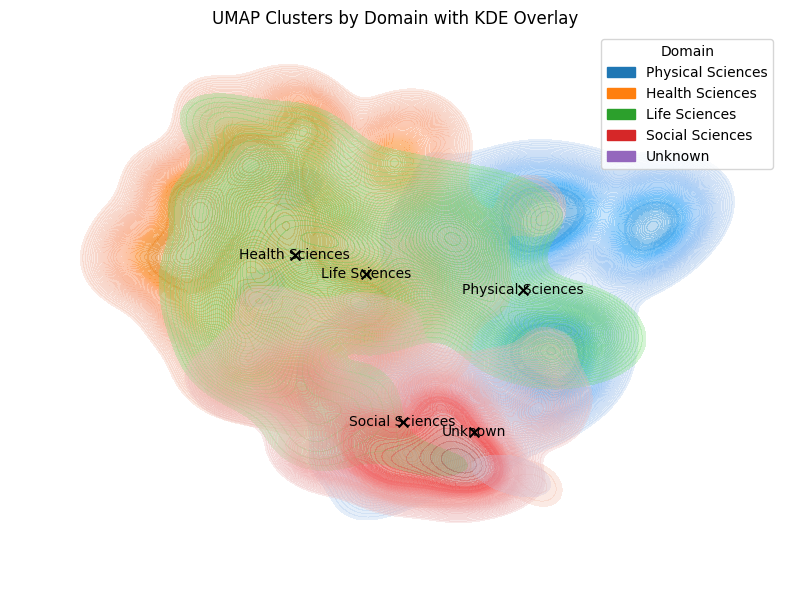

               label  count  centroid_x  centroid_y  avg_dist   std_dev
3    Social Sciences   1534    2.822948    1.125486  1.814605  1.114753
4            Unknown     62    4.245403    0.841318  1.952123  1.299203
1    Health Sciences   3250    0.675875    5.605784  2.578769  1.226551
0  Physical Sciences   1892    5.208808    4.661414  2.682868  1.240617
2      Life Sciences   1140    2.094917    5.091106  2.728963  1.228657


In [27]:
df_st_analysis_density = compute_cluster_spread_with_density(df, label_col='Domain', x_col='x_st', y_col='y_st', plot=True)
print(df_st_analysis_density)

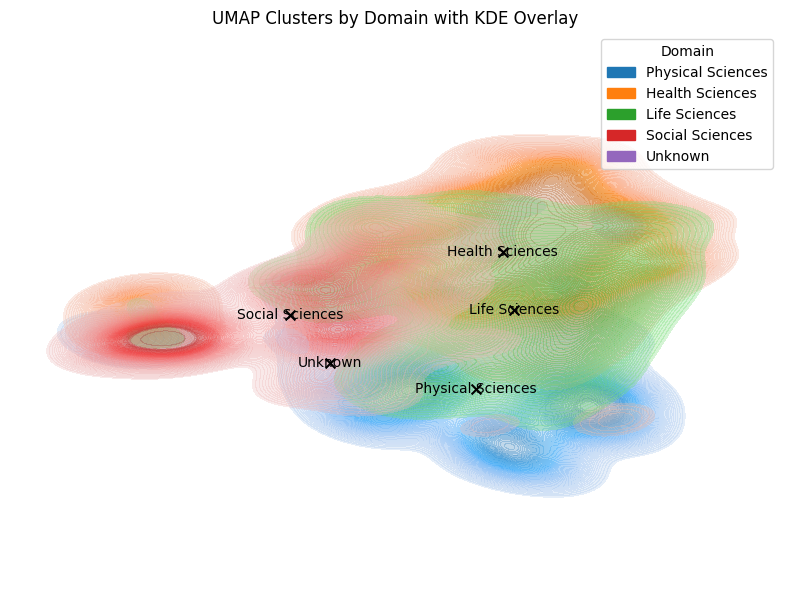

               label  count  centroid_x  centroid_y  avg_dist   std_dev
4            Unknown     62    5.264532   -1.252416  2.163936  1.378552
3    Social Sciences   1534    4.489965    0.286869  2.179875  1.102126
1    Health Sciences   3250    8.646315    2.317088  2.315242  1.538792
2      Life Sciences   1140    8.866915    0.456576  2.324013  1.267118
0  Physical Sciences   1892    8.129327   -2.111644  2.361315  1.302190


In [28]:
df_nomic_analysis_density = compute_cluster_spread_with_density(df, label_col='Domain', x_col='x_nomic', y_col='y_nomic', plot=True)
print(df_nomic_analysis_density)

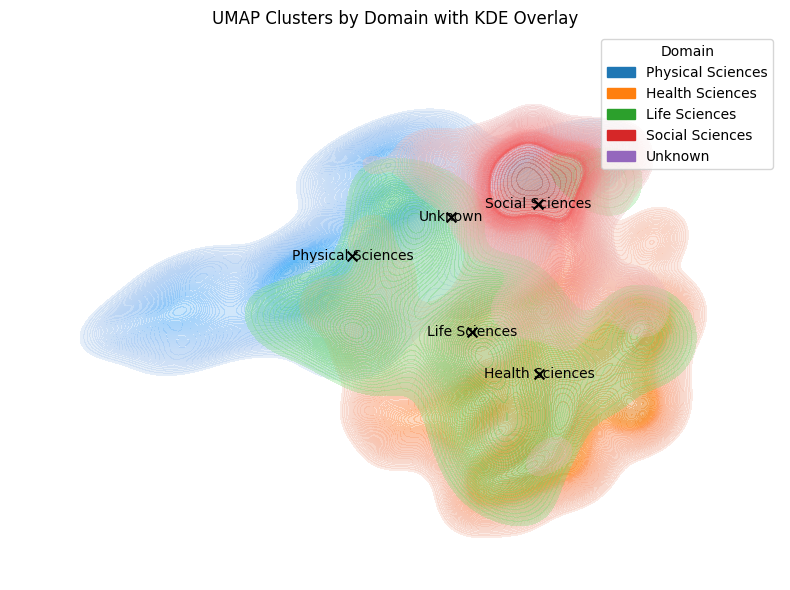

               label  count  centroid_x  centroid_y  avg_dist   std_dev
3    Social Sciences   1534   11.544288    6.622336  1.463801  1.093090
4            Unknown     62    9.515633    6.287239  2.148745  1.607155
1    Health Sciences   3250   11.561981    2.202484  2.328284  1.061992
2      Life Sciences   1140    9.998125    3.282483  2.626552  1.270081
0  Physical Sciences   1892    7.219697    5.276169  2.743095  1.561510


In [29]:
df_specter_analysis_density = compute_cluster_spread_with_density(df, label_col='Domain', x_col='x_specter', y_col='y_specter', plot=True)
print(df_specter_analysis_density)